In [1]:
import os 
import pandas as pd
import numpy as np

In [2]:
path = './kmrd'

In [4]:
os.listdir(path)

['peoples.csv',
 '.DS_Store',
 'countries.csv',
 'rates-2m.csv',
 'genres.csv',
 'castings.csv',
 'movies.csv']

## datasets overview

In [25]:
#ratings_df
ratings_df = pd.read_csv(os.path.join(path,"rates-2m.csv") ,encoding= "utf-8")
ratings_df.head()

,user,movie,rate,time
0,0,10002,10,1295794800
1,0,10003,9,1295794800
2,0,10004,9,1295794800
3,0,10005,5,1331564400
4,0,10006,3,1331650800


In [26]:
#movies_df
movies_df = pd.read_csv(os.path.join(path,"movies.txt"),sep = '\t',encoding= "utf-8")
movies_df.head()

,movie,title,title_eng,year,grade
0,10001,시네마 천국,"Cinema Paradiso , 1988",1990,전체 관람가
1,10002,빽 투 더 퓨쳐,"Back To The Future , 1985",1987,12세 관람가
2,10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",1990,12세 관람가
3,10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가
4,10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1978,PG


In [32]:
#countres_df
countries_df = pd.read_csv(os.path.join(path,"countries.csv"),encoding= "utf-8")
countries_df.head()

,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [27]:
#genres_df
genres_df = pd.read_csv(os.path.join(path,"genres.csv"), encoding = 'utf-8')
genres_df.head()

,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [31]:
#castings_df
castings_df = pd.read_csv(os.path.join(path,"castings.csv"),encoding= "utf-8")
castings_df.head()

,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [38]:
castings_df[castings_df['leading'] == 1].people.value_counts()

1833      490
1753      337
29349     304
18477     292
15267     272
         ... 
256838      1
12692       1
20888       1
18843       1
343256      1
Name: people, Length: 96029, dtype: int64

In [28]:
#peoples_df
peoples_df = pd.read_csv(os.path.join(path,"peoples.txt") ,sep = '\t',encoding= "utf-8")
peoples_df.head()

,people,korean,original
0,1,알리야,Aaliyah
1,2,압바스 키아로스타미,Abbas Kiarostami
2,3,아벨 페라라,Abel Ferrara
3,4,아담 아킨,Adam Arkin
4,5,아담 볼드윈,Adam Baldwin


## X_fields 설계

x = [year, grade, country, genres, people] 

continuous = []  
categorical one-hot = [year, grade, country, genres]  
categorical multi-hot = [people]

## castings_df

In [101]:
castings_df.head()

,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [102]:
castings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819743 entries, 0 to 819742
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   movie    819743 non-null  int64
 1   people   819743 non-null  int64
 2   order    819743 non-null  int64
 3   leading  819743 non-null  int64
dtypes: int64(4)
memory usage: 25.0 MB


In [103]:
castings_df.describe()

,movie,people,order,leading
count,819743.000000,819743.000000,819743.000000,819743.000000
mean,75633.427569,119942.852611,9.047822,0.371414
std,44817.128330,116267.618066,12.039730,0.483183
min,10001.000000,1.000000,1.000000,0.000000
25%,38505.000000,15839.000000,2.000000,0.000000
50%,72322.000000,78530.000000,5.000000,0.000000
75%,104426.000000,203819.500000,10.000000,1.000000
max,190991.000000,435627.000000,245.000000,1.000000


30번 이상 주연을 한 사람은  1047 명

count    1047.000000
mean       47.596944
std        32.579186
min        30.000000
25%        34.000000
50%        39.000000
75%        49.000000
max       490.000000
Name: leading, dtype: float64


<AxesSubplot:xlabel='people'>

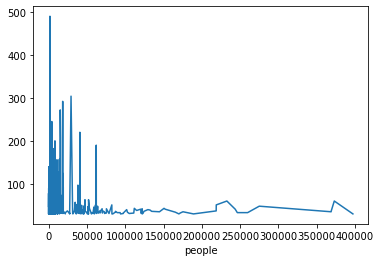

In [100]:
#n=30 번 이상 주연을 한 배우들.
#너무 sparse 해서 30으로 설정.
n_leading = 30
print(f"{n_leading}번 이상 주연을 한 사람은 ",len(castings_df[castings_df.leading==1].groupby("people").leading.sum()[castings_df[castings_df.leading==1].groupby("people").leading.sum()>=n_leading]),"명")
print()
print(castings_df[castings_df.leading==1].groupby("people").leading.sum()[castings_df[castings_df.leading==1].groupby("people").leading.sum()>=30].describe())
castings_df[castings_df.leading==1].groupby("people").leading.sum()[castings_df[castings_df.leading==1].groupby("people").leading.sum()>=n_leading].plot()